In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/teen-phone-addiction/teen_phone_addiction_dataset.csv


In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

warnings.filterwarnings("ignore") 

In [ ]:

dataset = pd.read_csv("/kaggle/input/teen-phone-addiction/teen_phone_addiction_dataset.csv")

df, df_test = train_test_split(dataset, test_size=0.2, shuffle=True)

In [2]:
#ProfileReport object, while renderable on Kaggle notebooks, cannot be rendered on github
"""
profile = ProfileReport(df, title="Teen Phone Addiction Dataset Profile")
profile
"""

'\nprofile = ProfileReport(df, title="Teen Phone Addiction Dataset Profile")\nprofile\n'

In [5]:
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
663,664,Francisco Sanchez,14,Other,South Jenna,10th,2.4,3.4,53,2,...,1.4,126,5,2.5,2.0,0.1,Browsing,1,6.0,8.7
2757,2758,Patricia Smith,16,Female,Dawnmouth,9th,7.9,7.6,68,0,...,0.7,32,18,2.5,2.0,0.4,Social Media,6,7.0,10.0
1110,1111,Jon Johnson,13,Male,Watkinsland,8th,5.7,6.7,100,4,...,0.0,51,9,0.8,1.3,1.3,Education,7,2.9,7.3
1458,1459,Kimberly Raymond,14,Female,South Theodore,7th,1.6,4.4,50,6,...,1.2,65,14,1.8,1.8,1.8,Social Media,9,3.8,7.1
520,521,Michael Duke,19,Female,Gordonton,9th,2.5,6.6,53,8,...,0.6,71,9,2.6,0.6,0.9,Education,1,6.3,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,2527,Jackie Rowe,18,Male,Walkerchester,7th,4.6,5.3,51,10,...,0.8,124,17,2.0,2.0,0.0,Browsing,1,6.9,10.0
2357,2358,Joseph Patterson,17,Male,Mcdanielstad,8th,2.9,7.9,83,6,...,0.0,30,5,2.4,2.8,2.0,Other,8,8.0,5.7
59,60,Kelly Carrillo,17,Female,West Tracey,7th,6.3,7.4,77,8,...,1.4,110,8,3.7,1.5,1.9,Gaming,1,3.1,10.0
532,533,Brooke Horn,17,Other,North Joseph,9th,3.9,6.6,72,7,...,1.0,78,8,2.1,0.5,0.0,Other,9,6.1,6.4


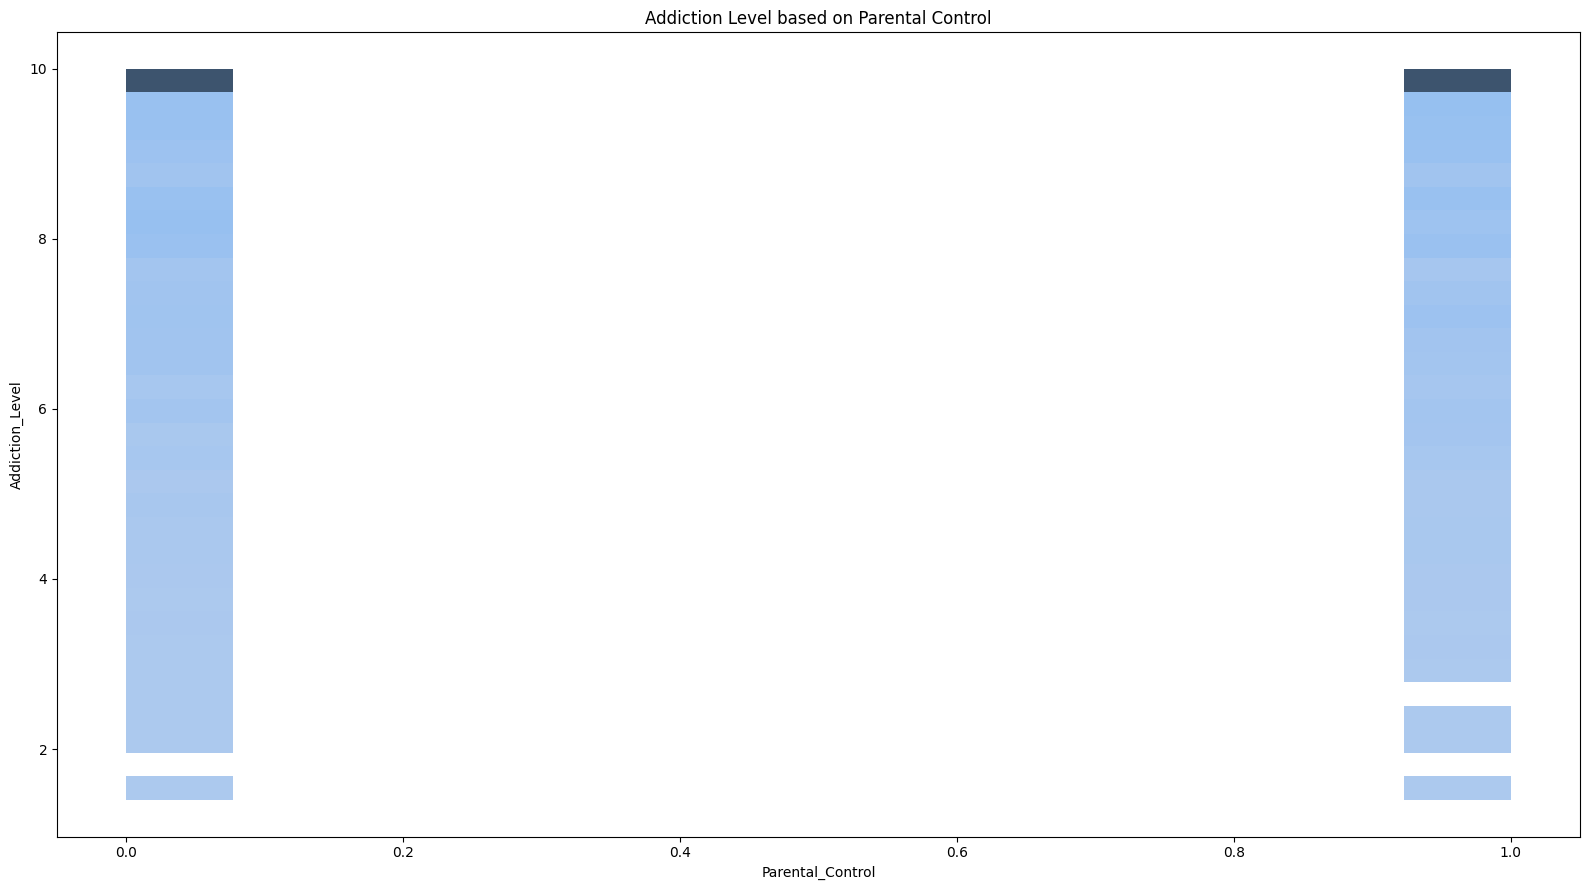

In [ ]:

f, axes = plt.subplots(figsize=(16, 9))
sns.histplot(data=df, x='Parental_Control', y='Addiction_Level')
plt.title("Addiction Level based on Parental Control")
plt.tight_layout()
plt.show()

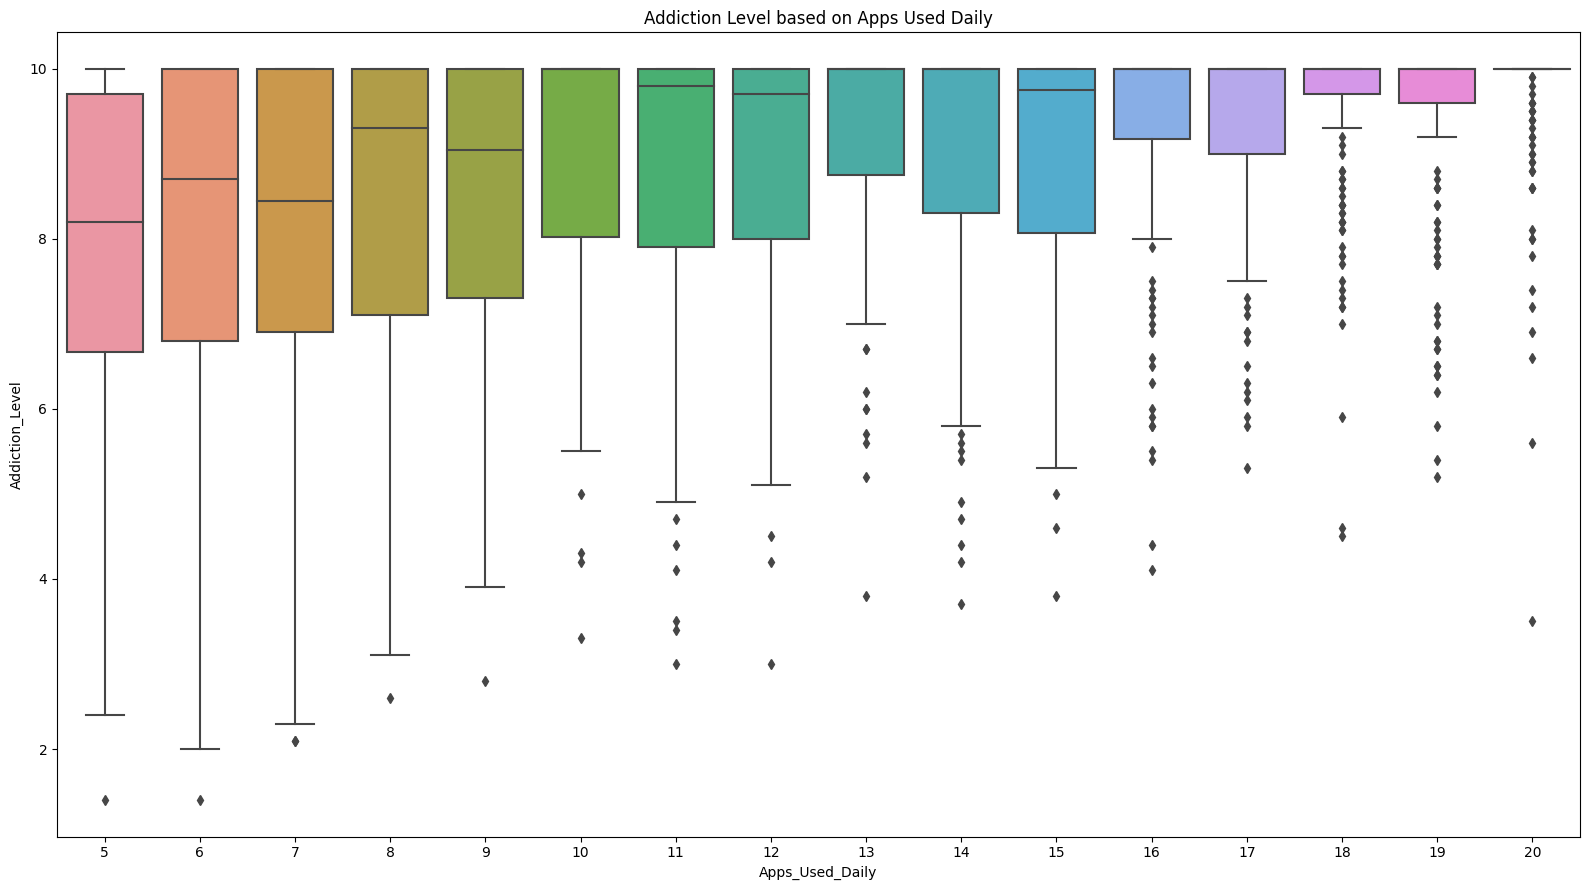

In [7]:
f, axes = plt.subplots(figsize=(16, 9))
sns.boxplot(data=df, x='Apps_Used_Daily', y='Addiction_Level')
plt.title("Addiction Level based on Apps Used Daily")
plt.tight_layout()
plt.show()

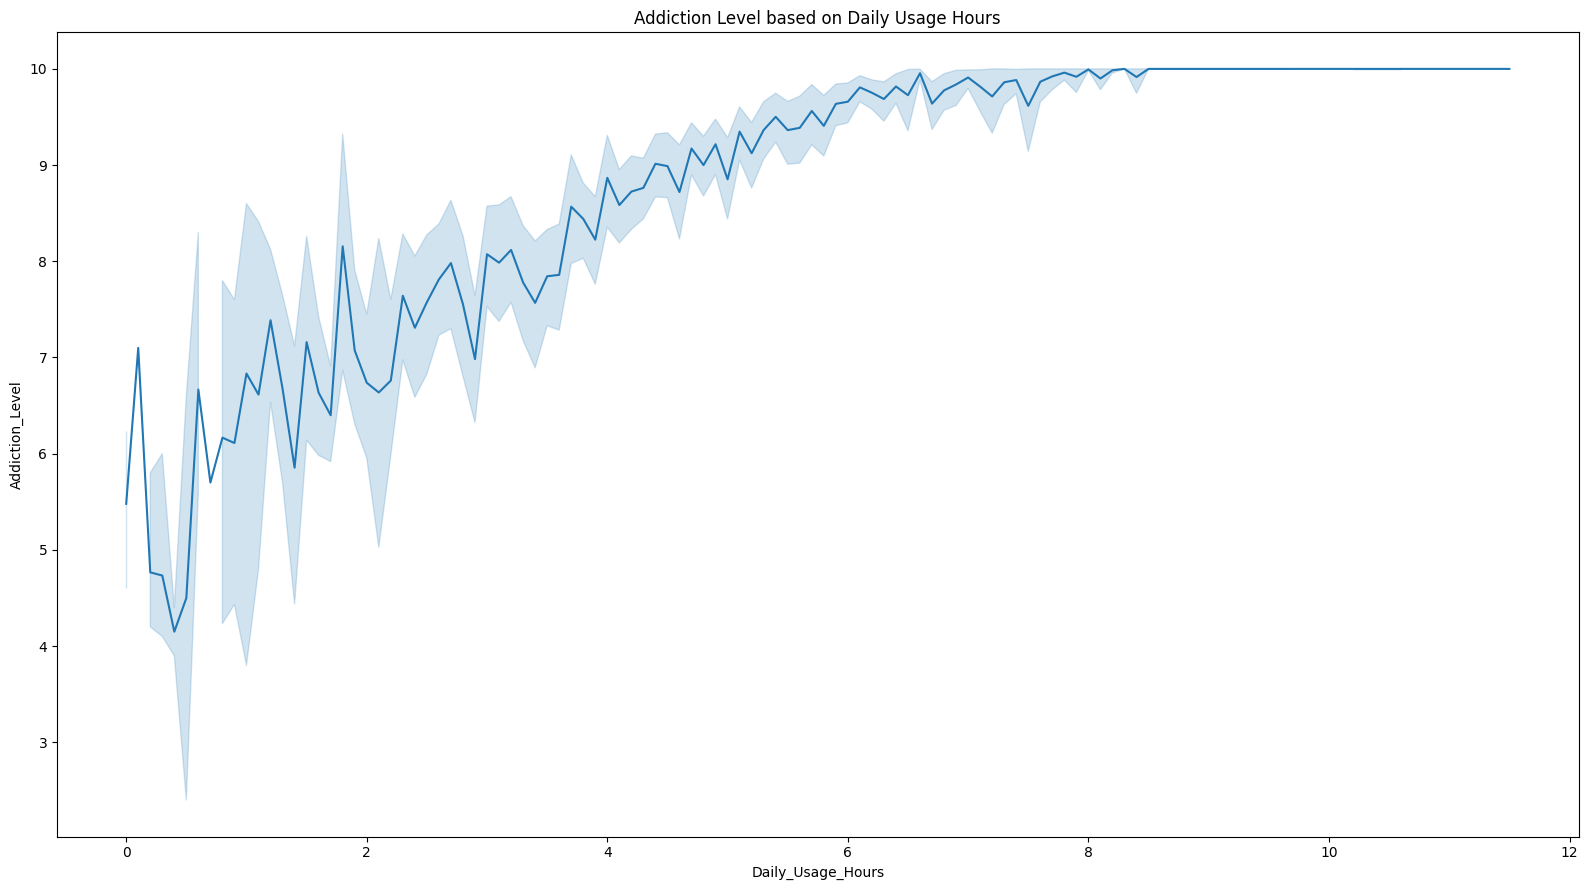

In [8]:
f, axes = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df, x='Daily_Usage_Hours', y='Addiction_Level')
plt.title("Addiction Level based on Daily Usage Hours")
plt.tight_layout()
plt.show()

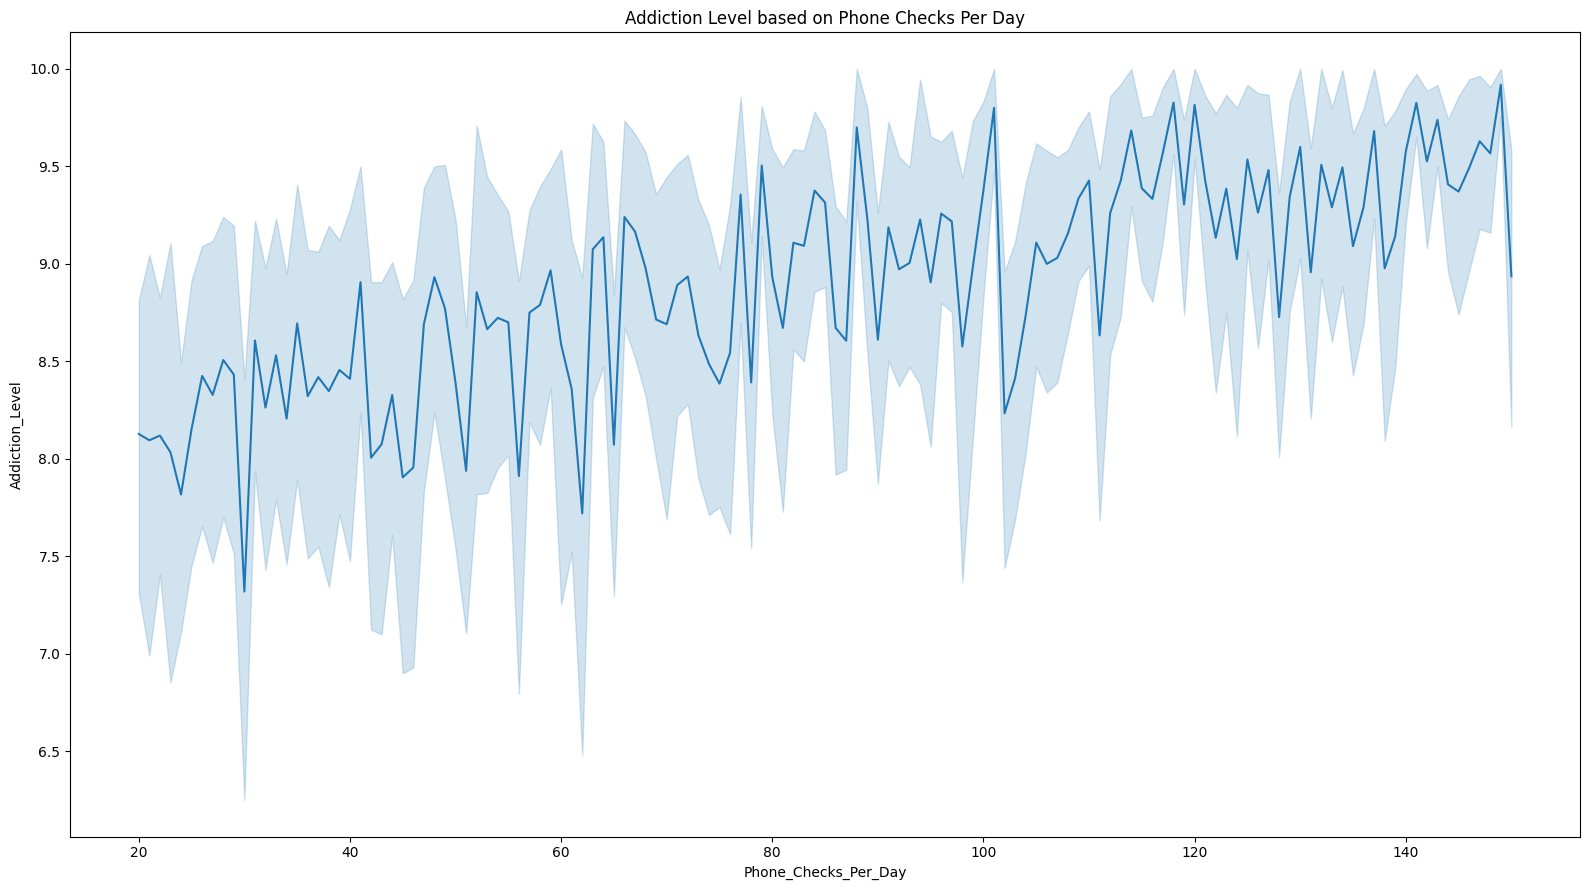

In [9]:
f, axes = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df, x='Phone_Checks_Per_Day', y='Addiction_Level')
plt.title("Addiction Level based on Phone Checks Per Day")
plt.tight_layout()
plt.show()

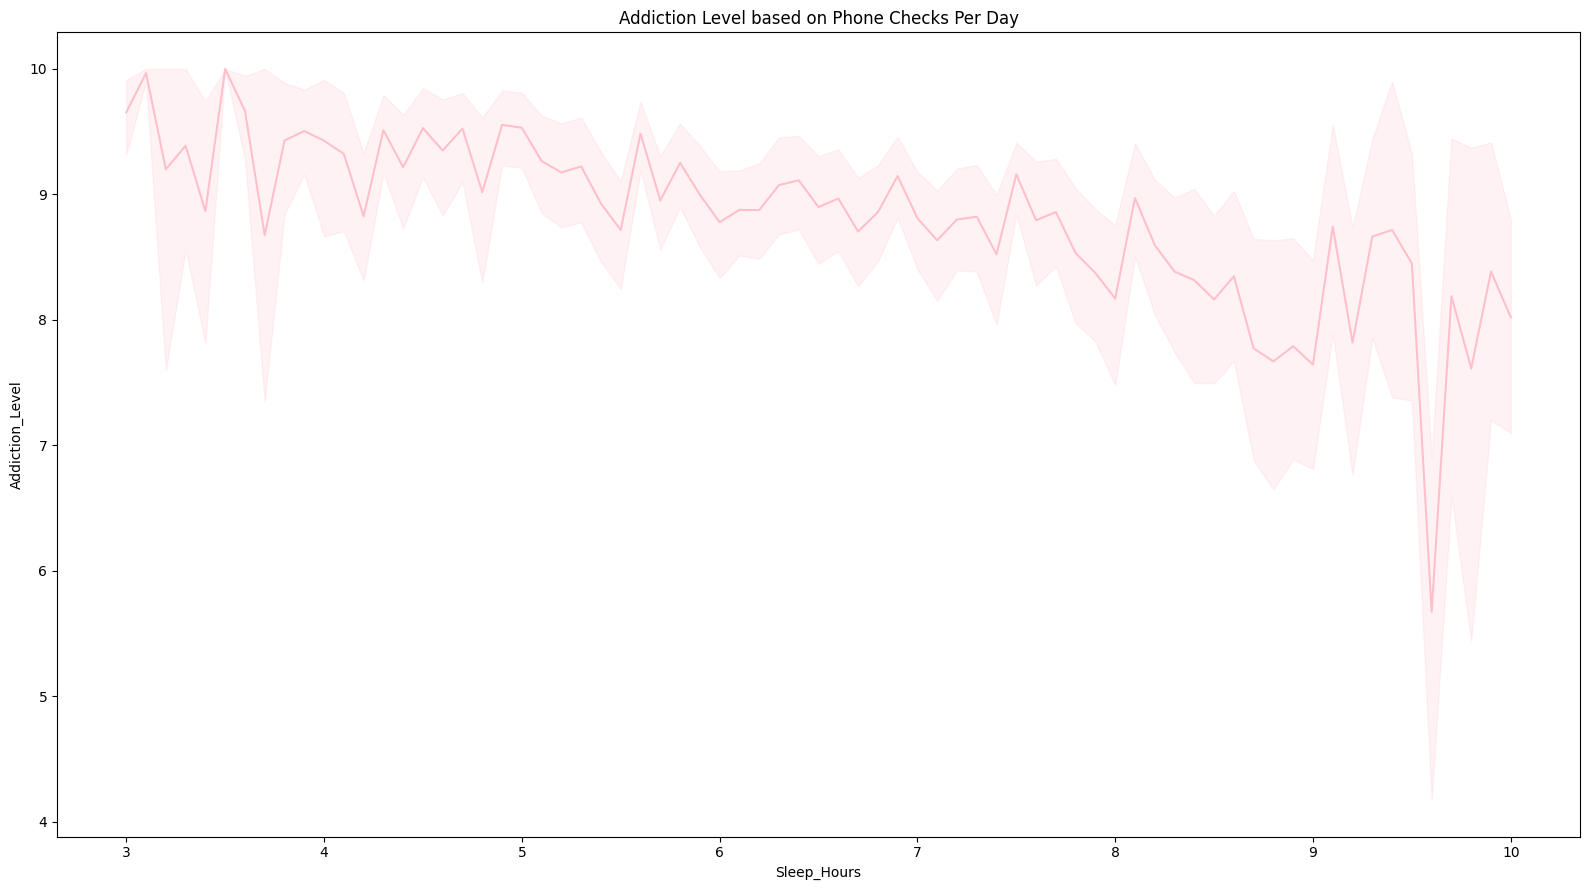

In [10]:
f, axes = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df, x='Sleep_Hours', y='Addiction_Level', color='pink')
plt.title("Addiction Level based on Phone Checks Per Day")
plt.tight_layout()
plt.show()

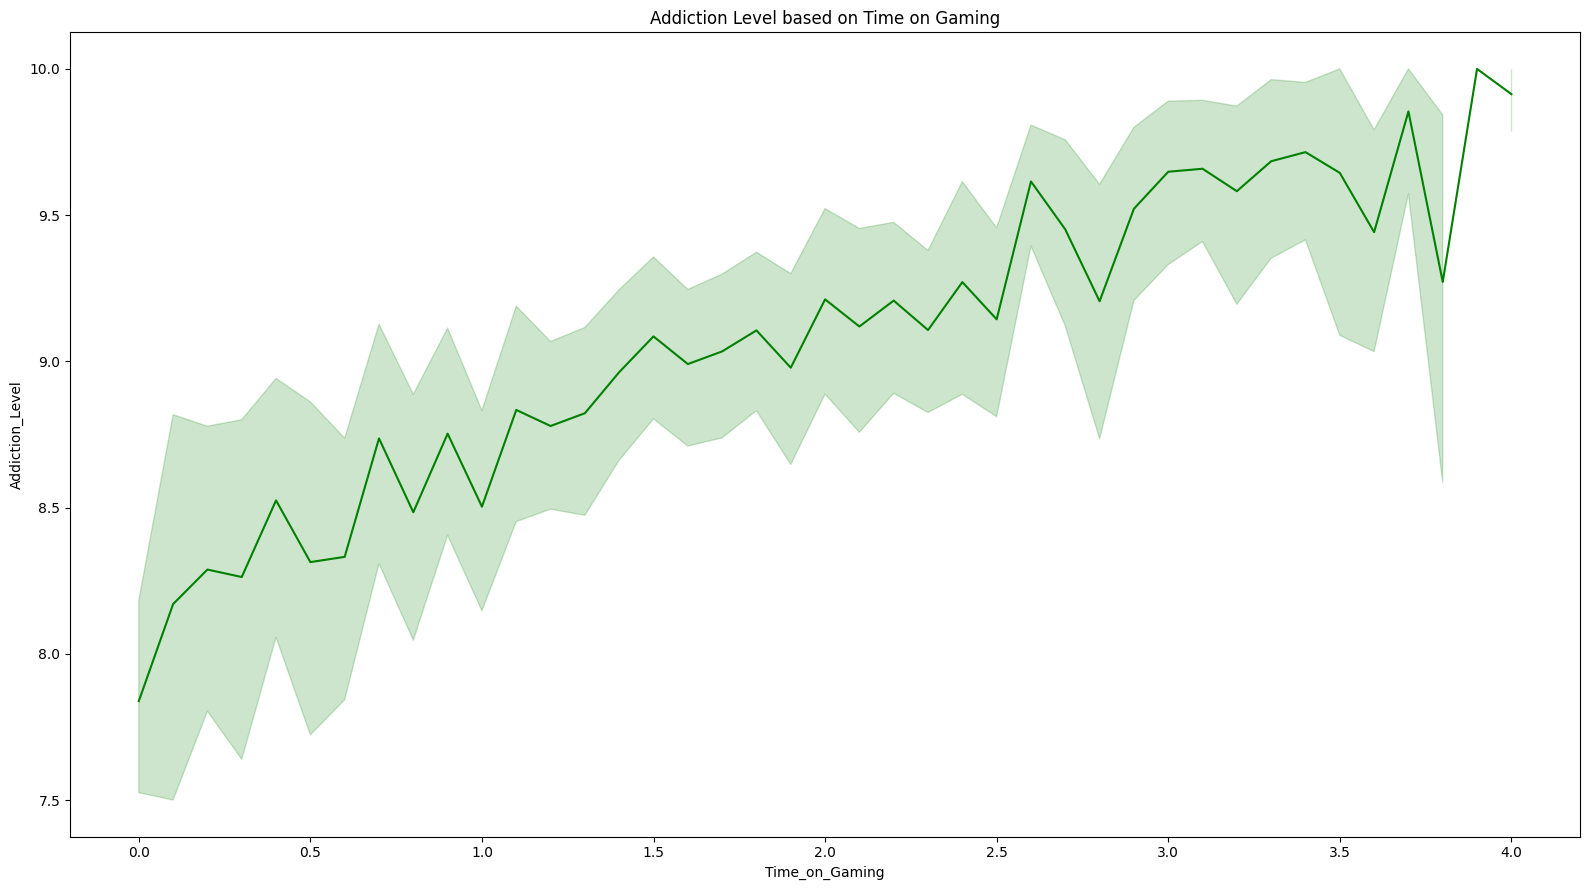

In [11]:
f, axes = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df, x='Time_on_Gaming', y='Addiction_Level', color='green')
plt.title("Addiction Level based on Time on Gaming")
plt.tight_layout()
plt.show()

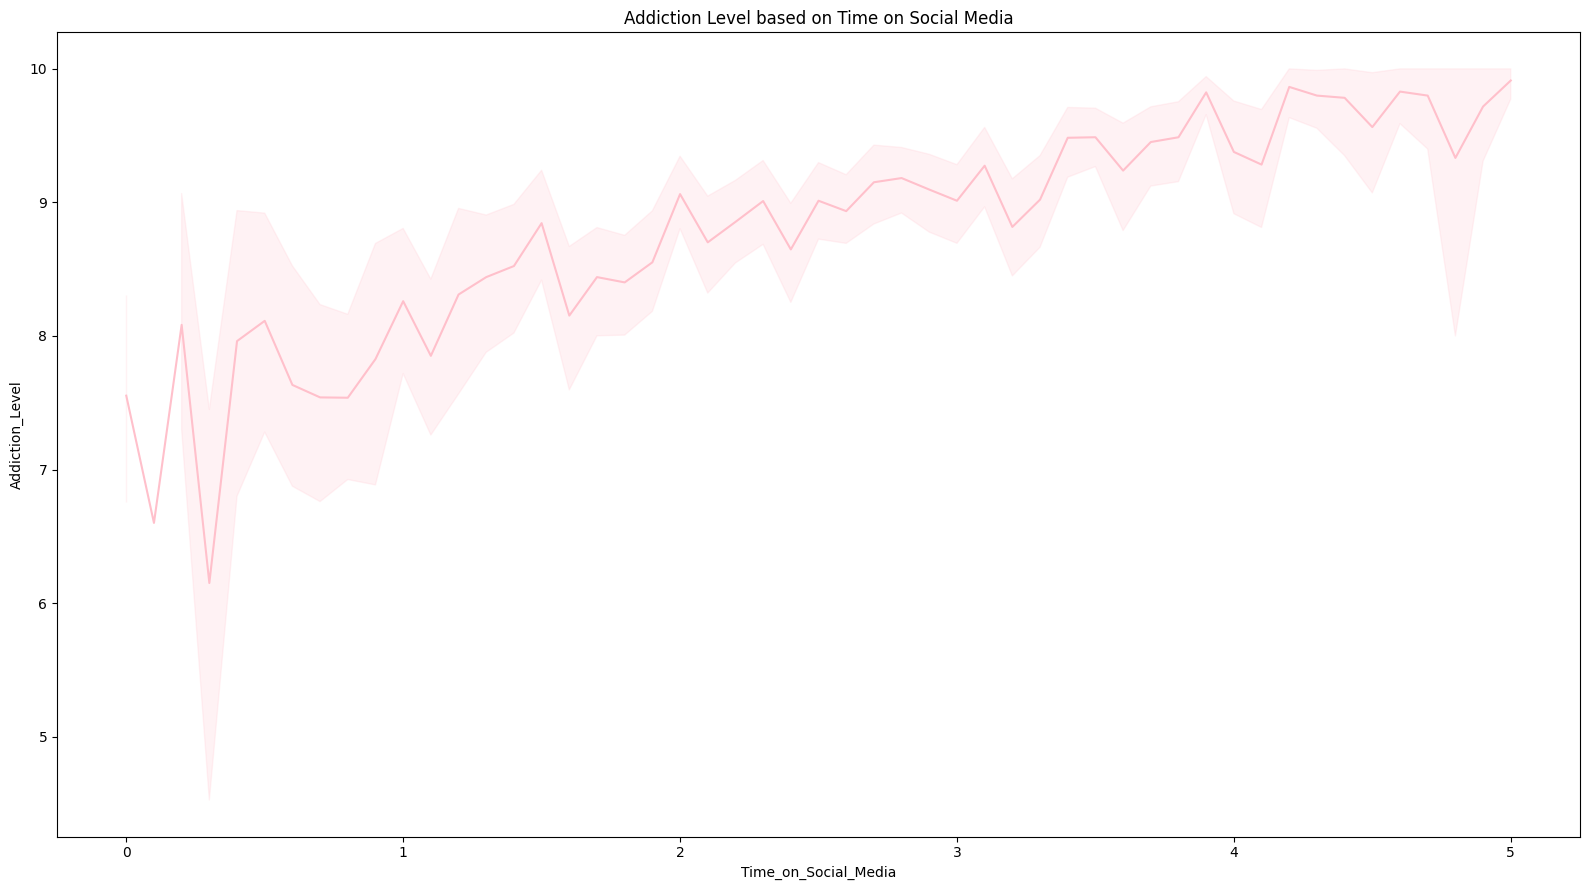

In [12]:
f, axes = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df, x='Time_on_Social_Media', y='Addiction_Level', color='pink')
plt.title("Addiction Level based on Time on Social Media")
plt.tight_layout()
plt.show()

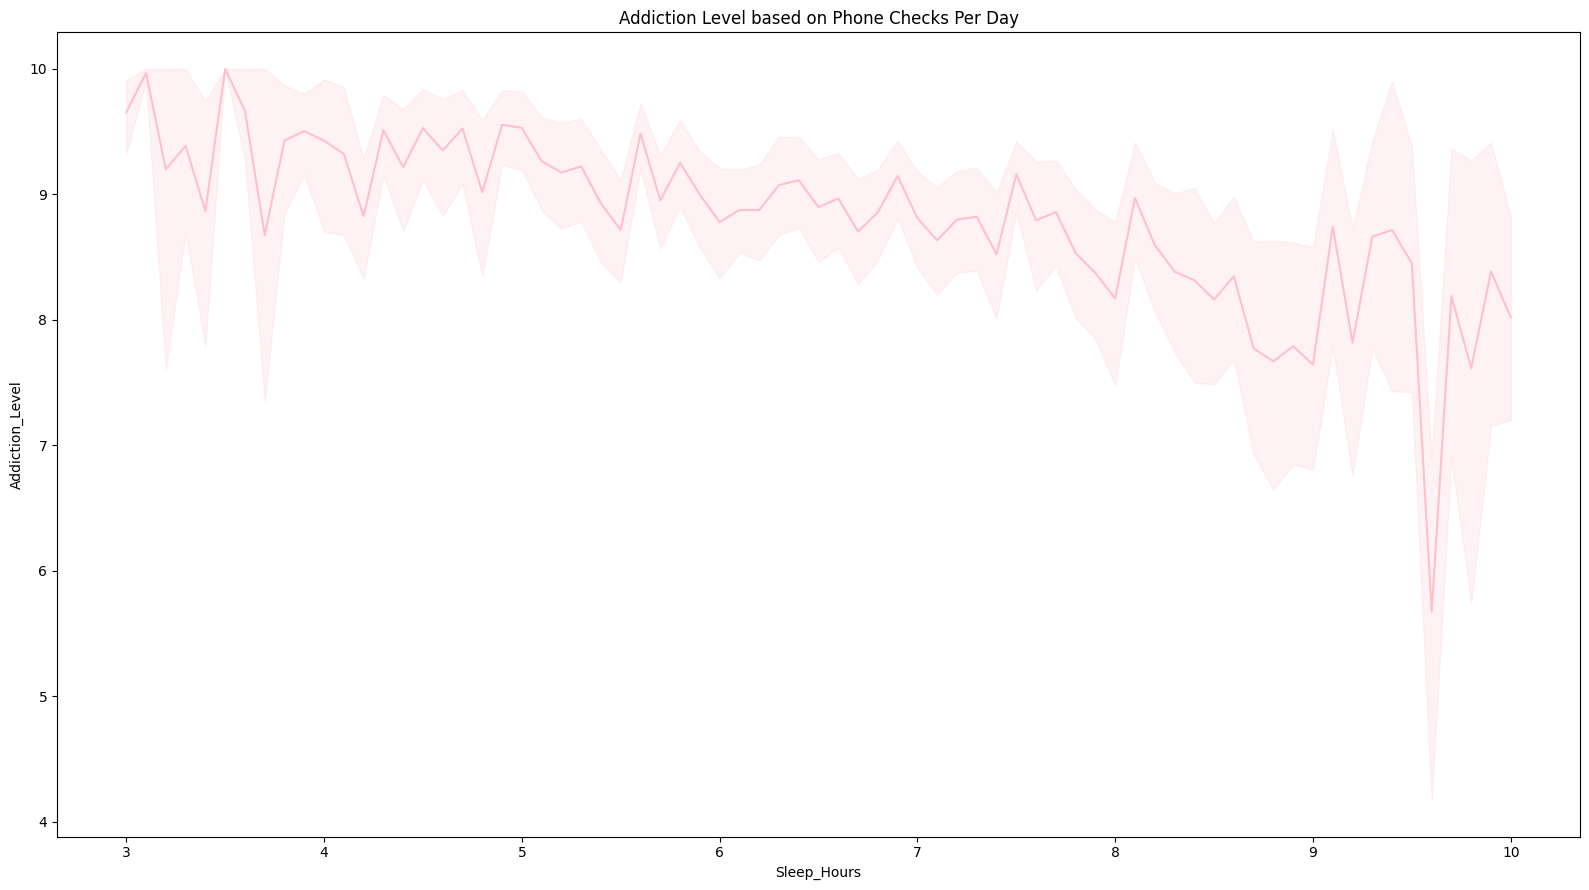

In [13]:
f, axes = plt.subplots(figsize=(16, 9))
sns.lineplot(data=df, x='Sleep_Hours', y='Addiction_Level', color='pink')
plt.title("Addiction Level based on Phone Checks Per Day")
plt.tight_layout()
plt.show()

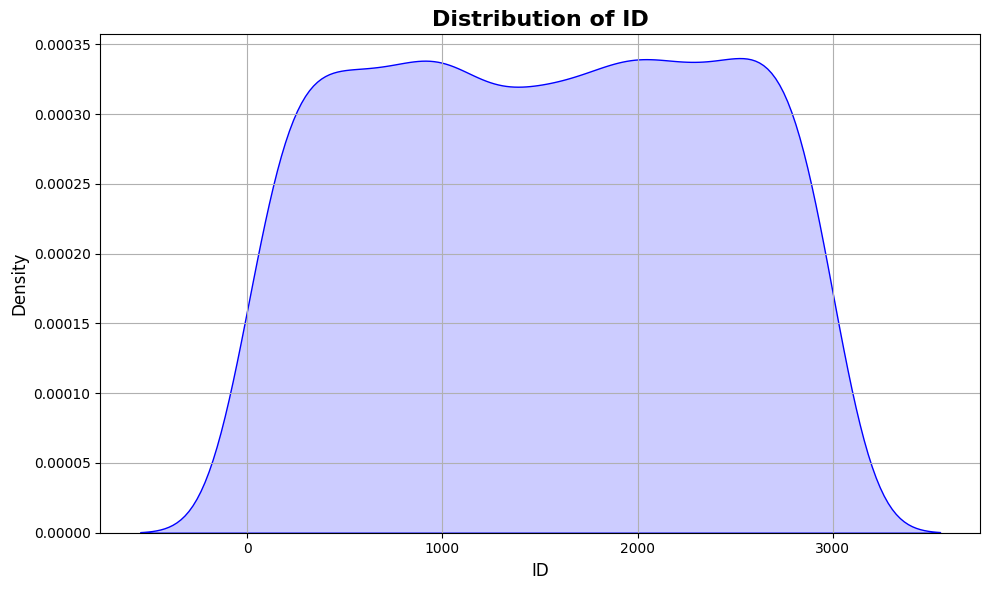

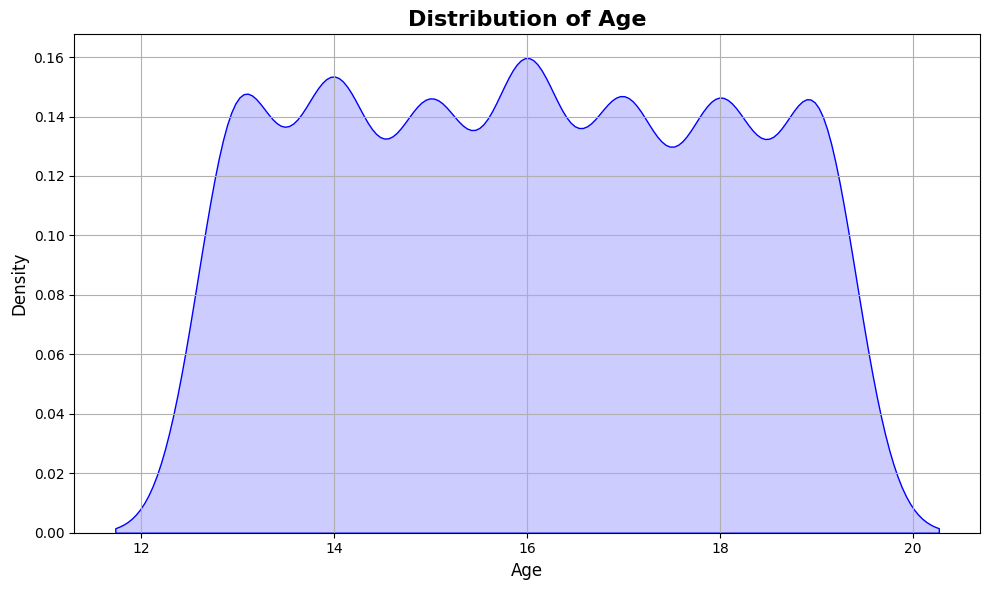

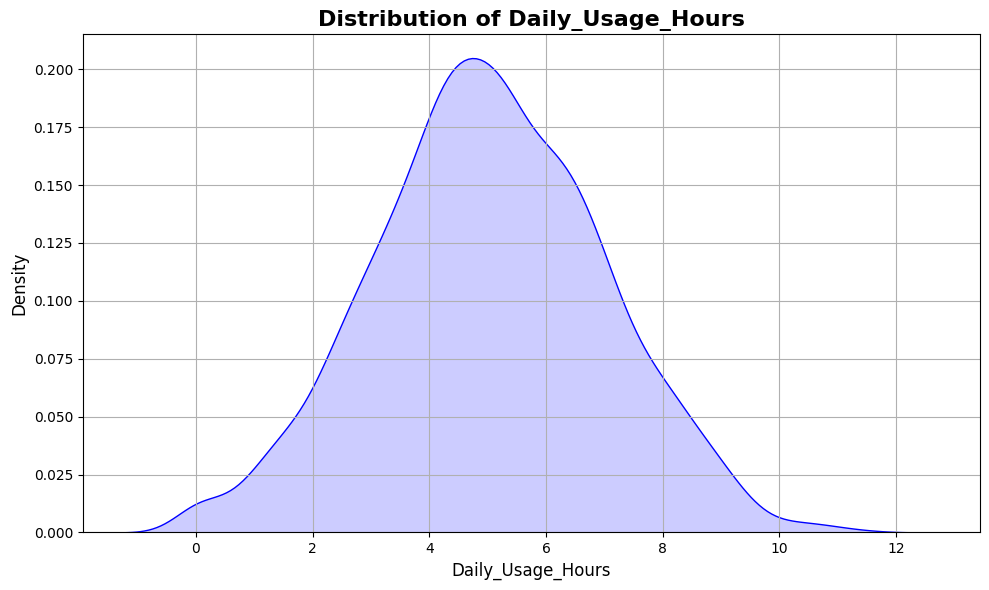

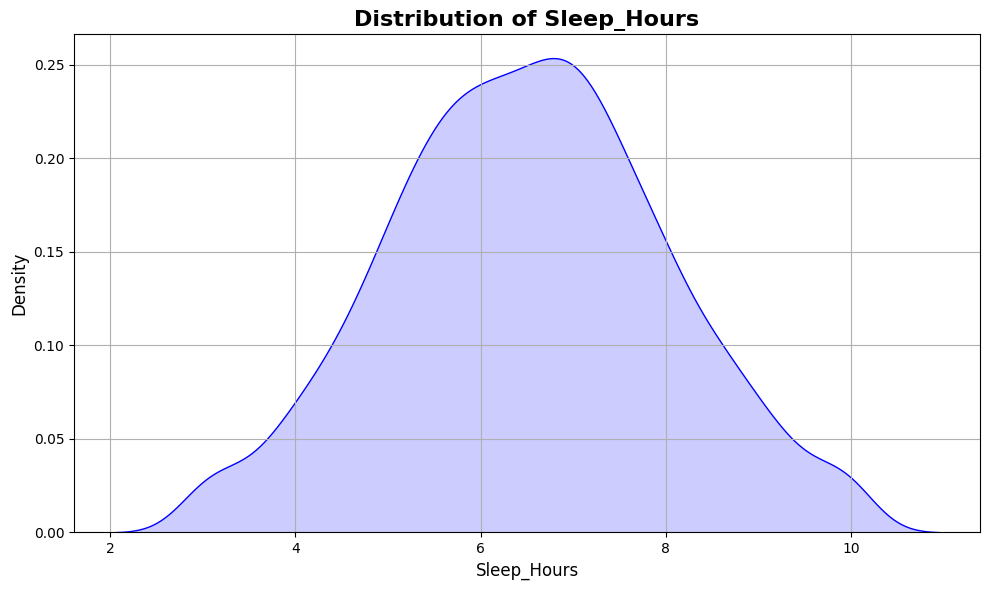

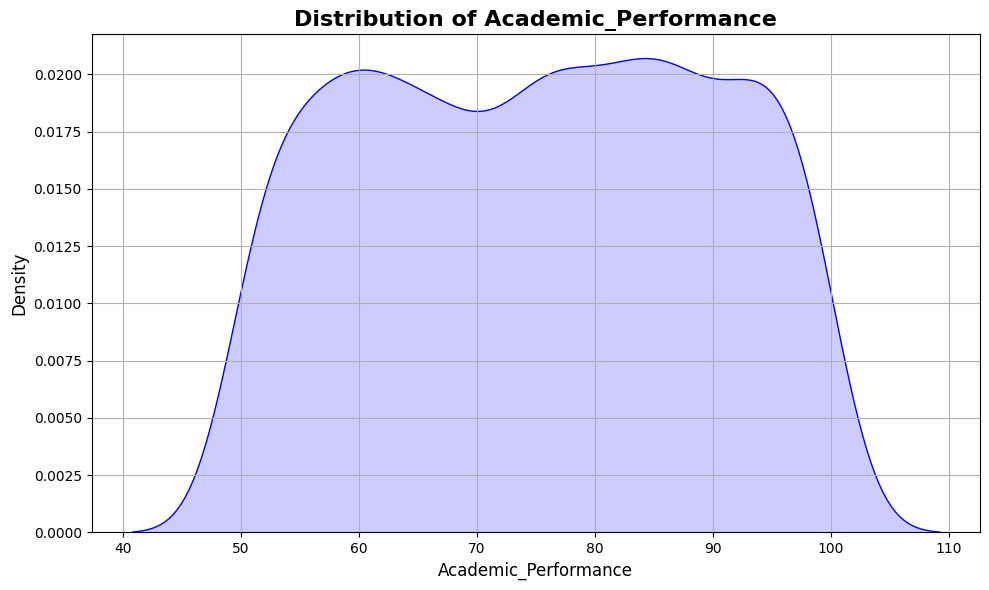

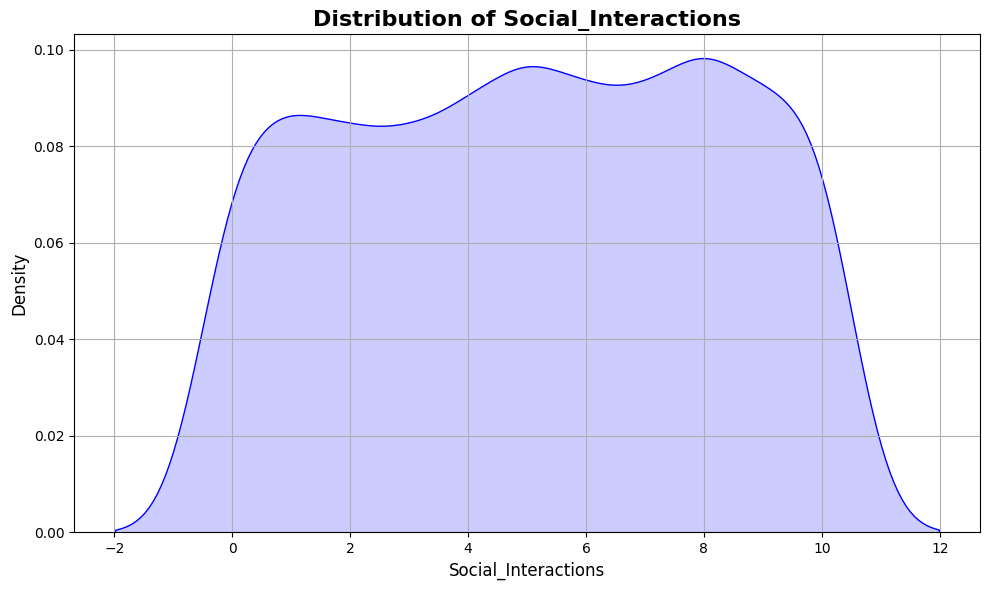

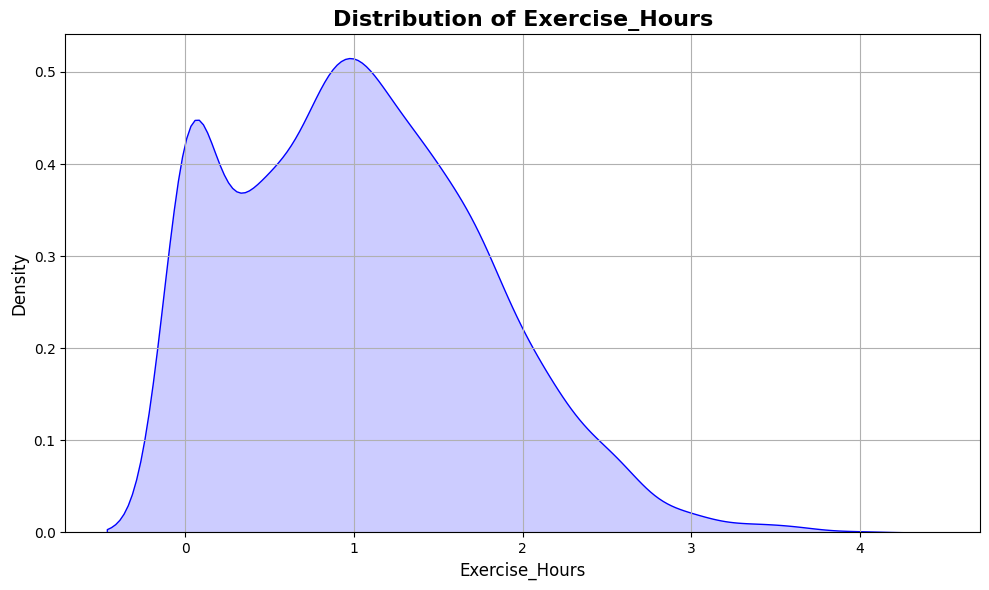

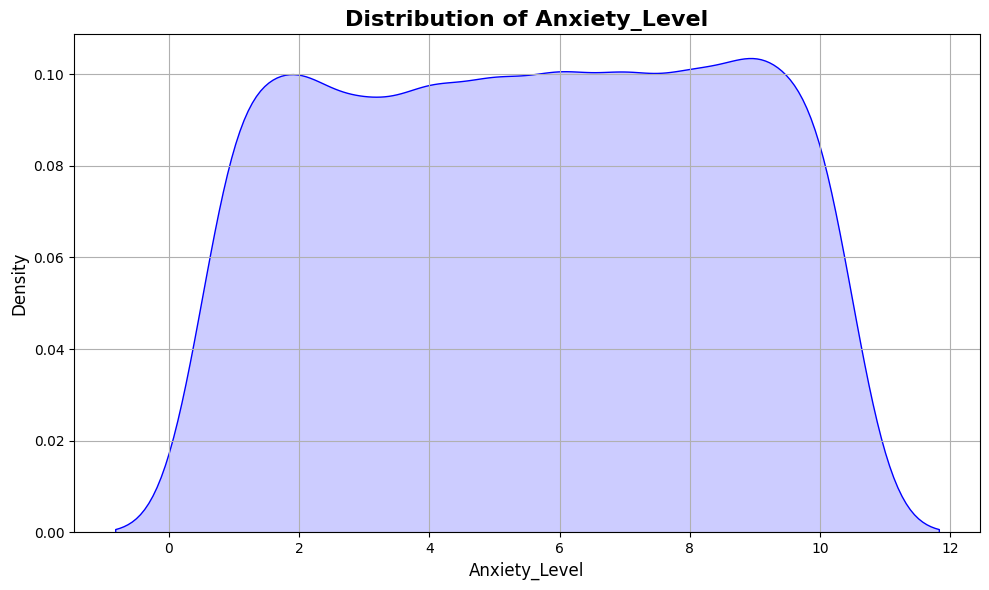

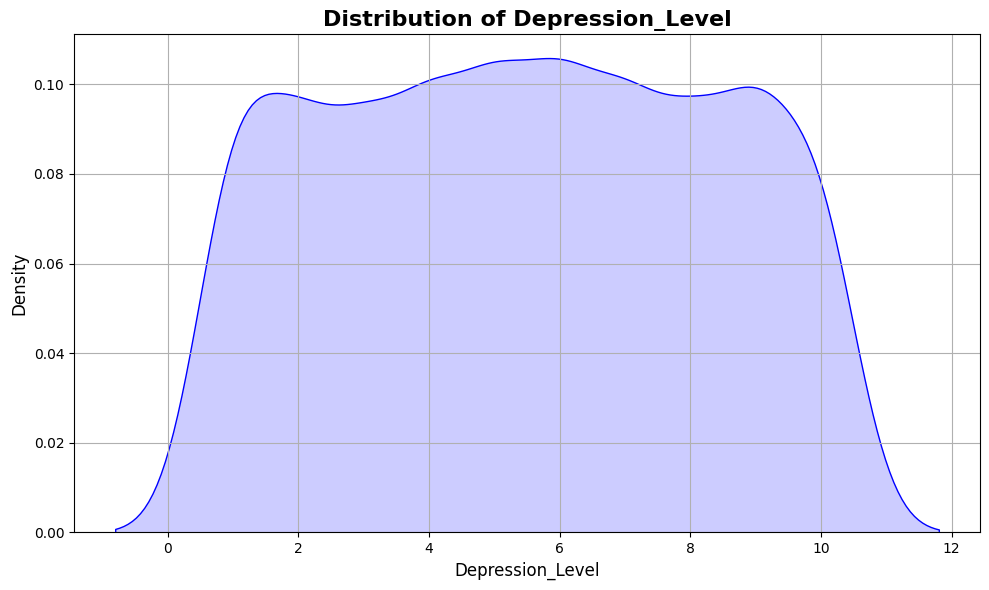

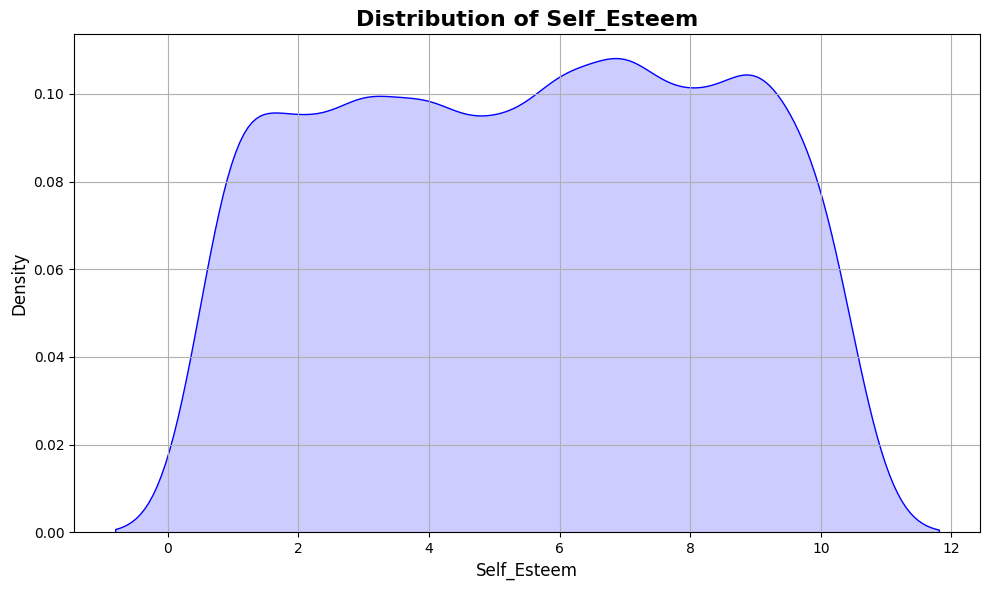

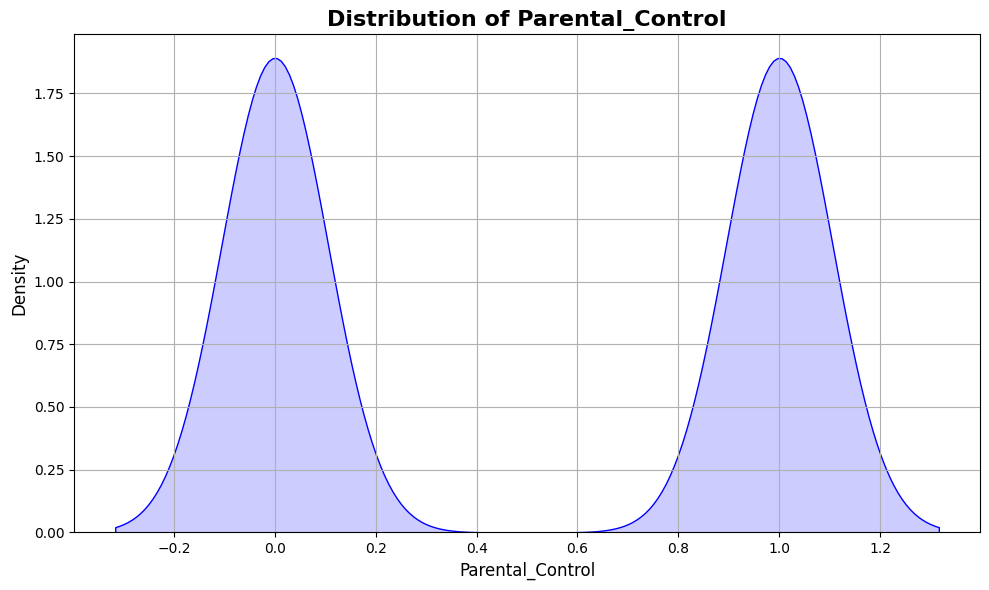

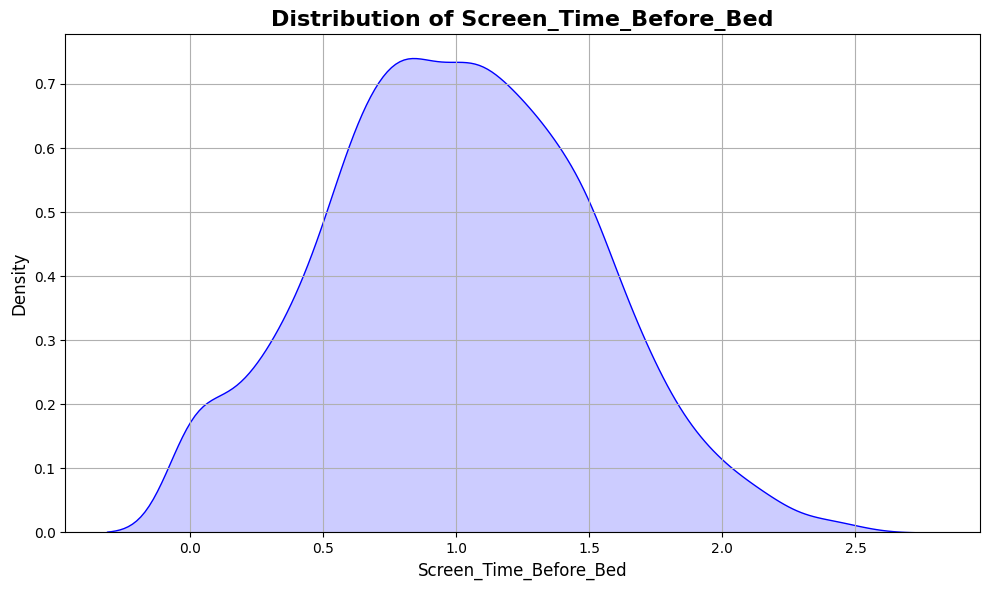

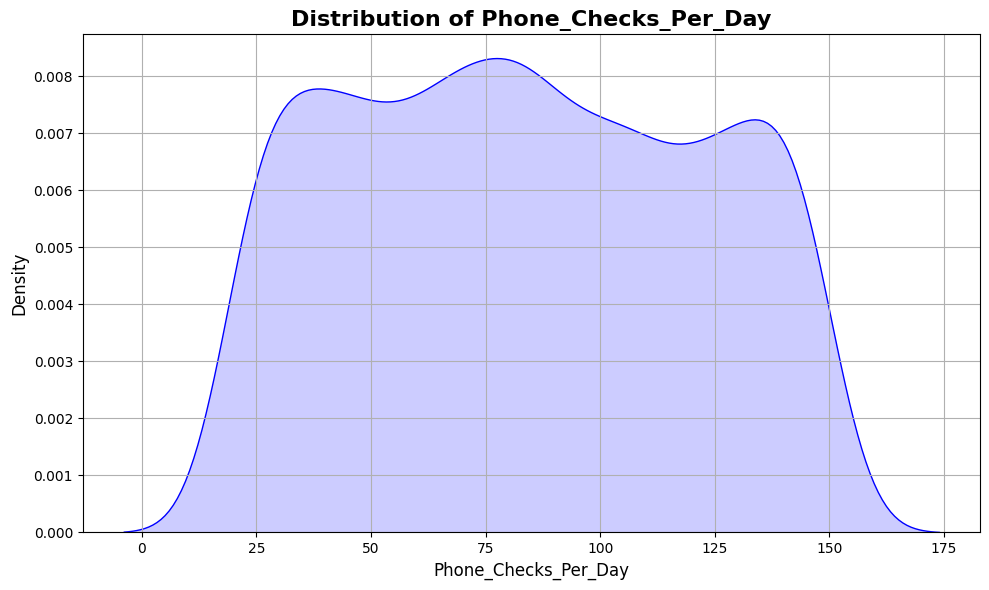

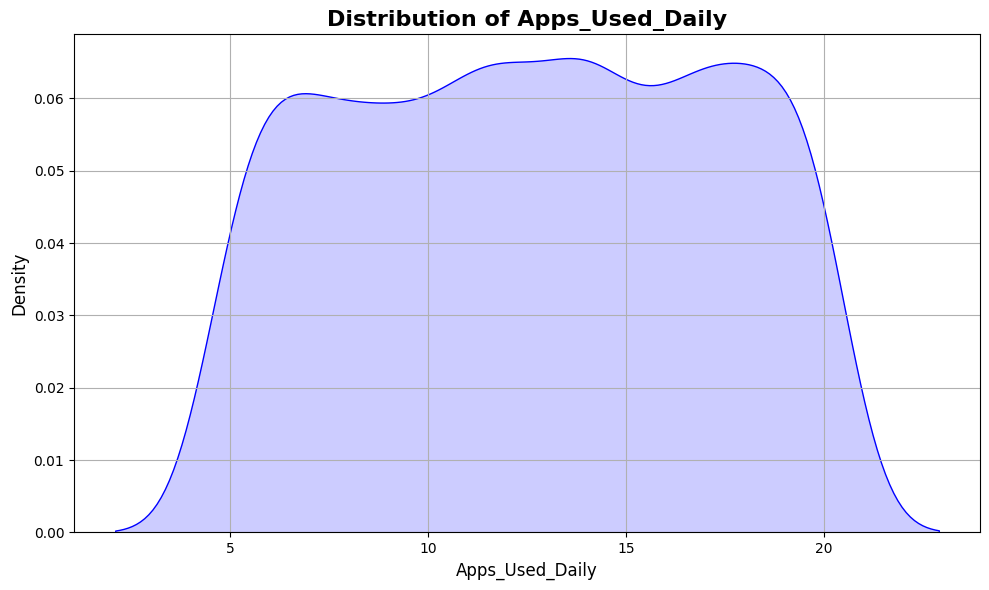

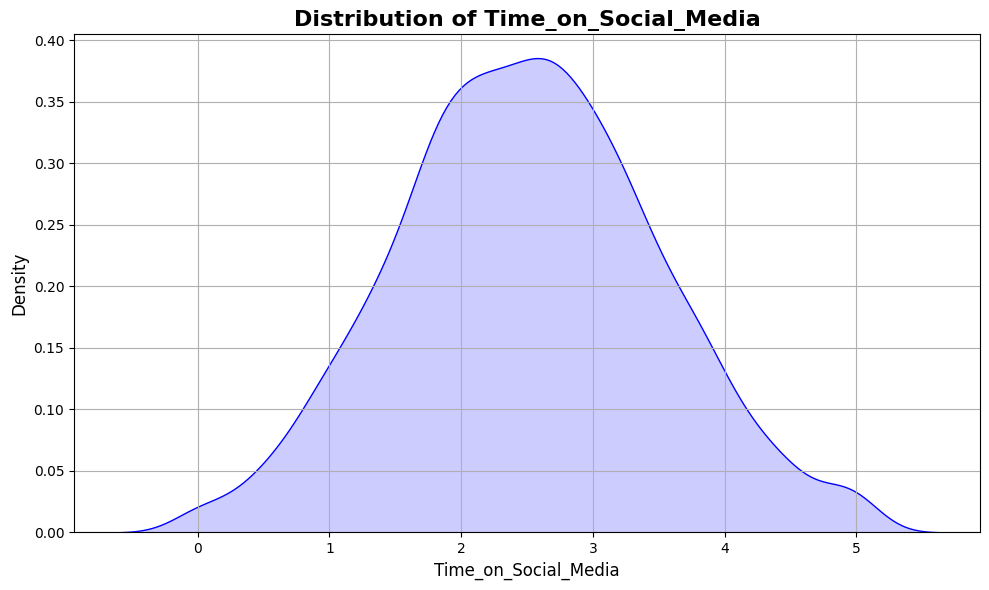

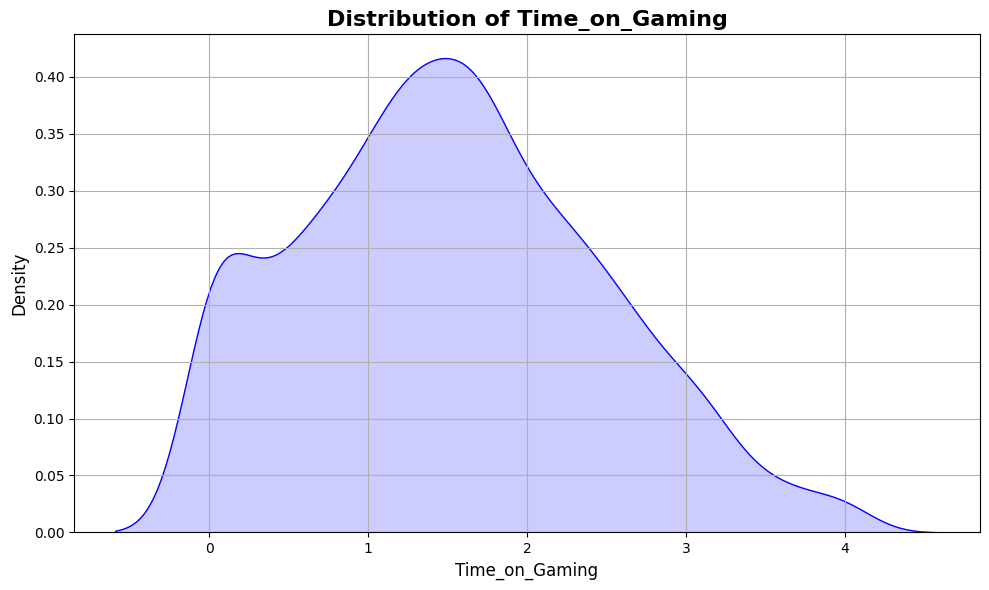

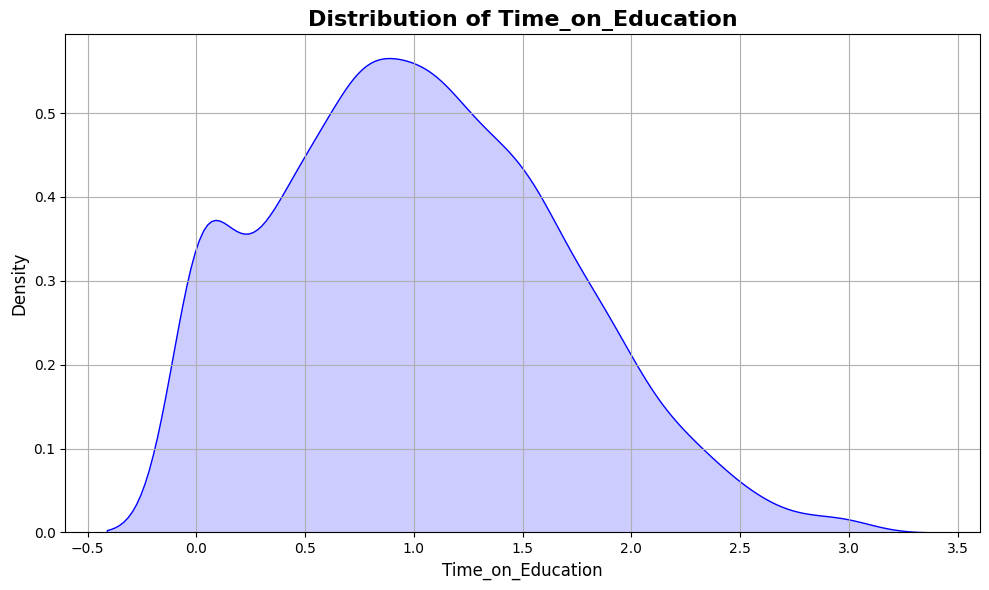

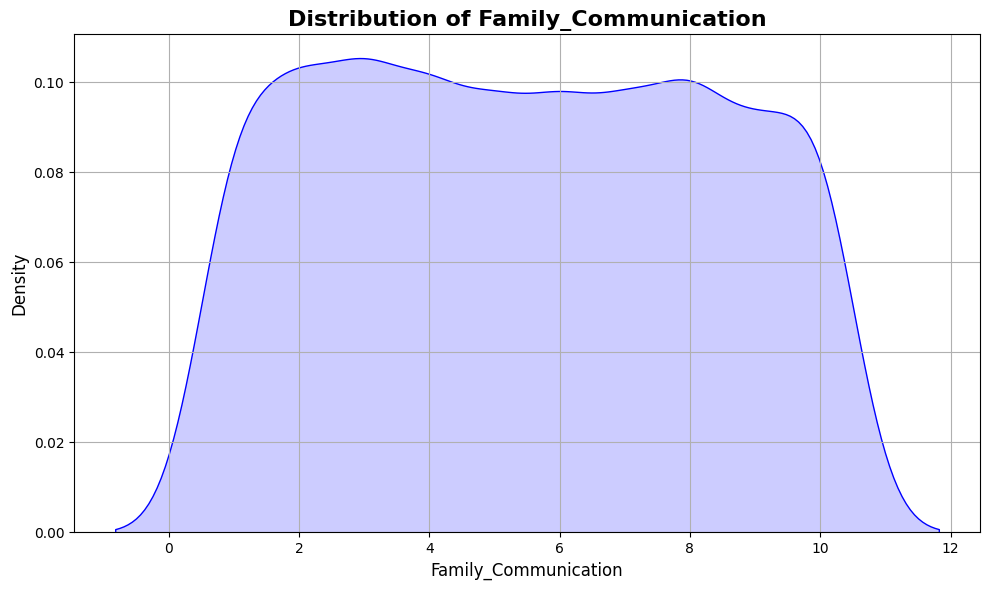

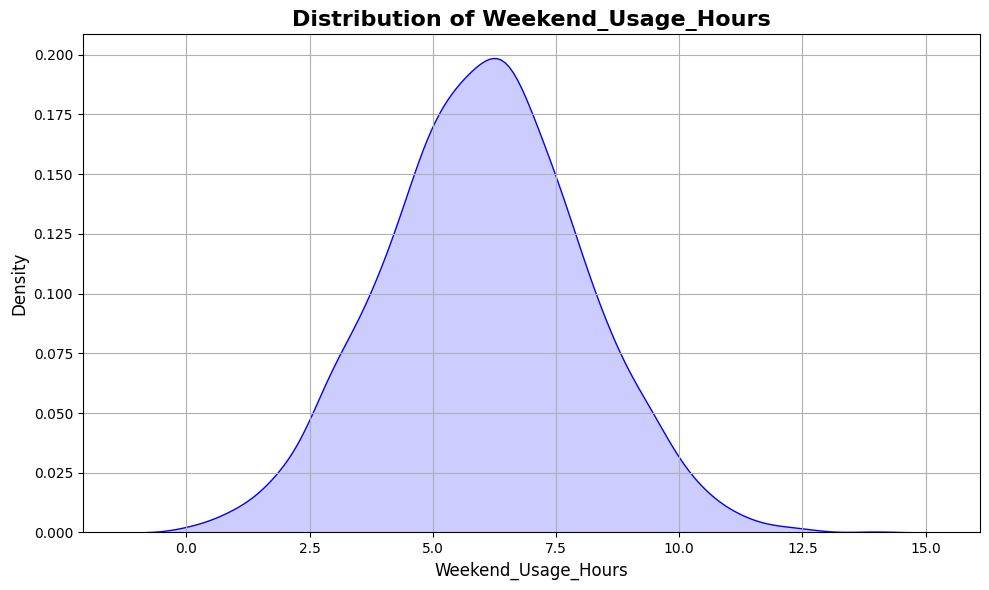

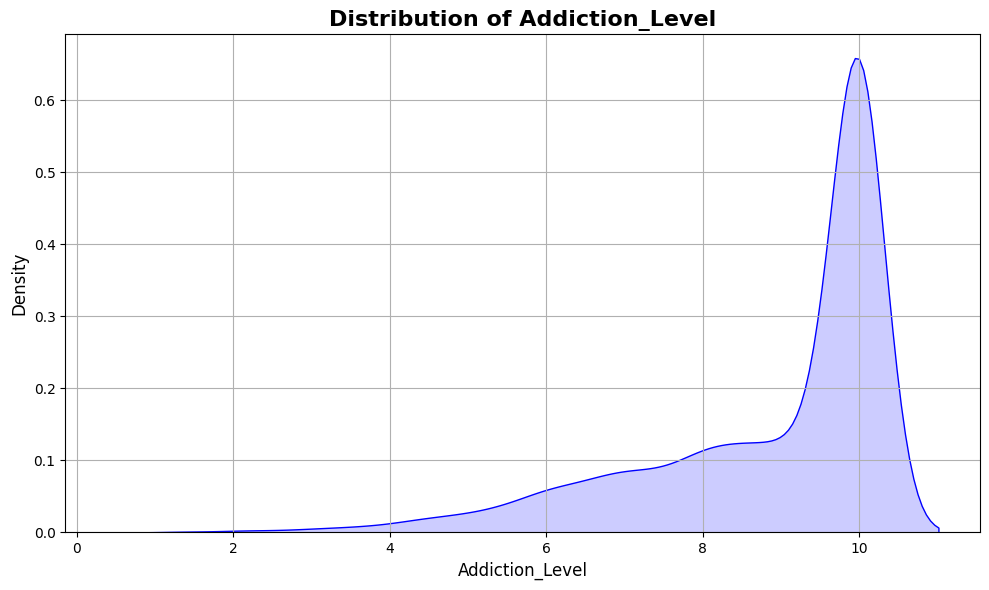

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    
    # kde
    sns.kdeplot(df[column], shade=True, color='blue', alpha=0.2)
    plt.title(f'Distribution of {column}', fontsize=16, fontweight="bold")
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [ ]:

def preprocess(df, is_train=True, label_encoders=None, scaler=None):
    y = df['Addiction_Level'].astype(int)
    X = df.drop(columns=['ID', 'Name', 'Location', 'Addiction_Level', 'Gender'])

    categorical_features = ['School_Grade', 'Phone_Usage_Purpose']

    if is_train:
        #label encode on train_df
        label_encoders = {}
        for col in categorical_features:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le

        #scale on train_df
        scaler = MinMaxScaler()
        X[X.columns] = scaler.fit_transform(X[X.columns])
    else:
        #label encode on test_df (if df is not train_df)
        for col in categorical_features:
            le = label_encoders[col]
            X[col] = le.transform(X[col])
        #scale on test_df (if df is not train_df)
        X[X.columns] = scaler.transform(X[X.columns])

    return X, y, label_encoders, scaler

In [17]:
preprocessed_df,_,_,_ = preprocess(df)
preprocessed_df

,Age,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours
663,0.166667,0.0,0.208696,0.057143,0.06,0.2,0.300,0.111111,0.333333,0.777778,1.0,0.56,0.815385,0.000000,0.50,0.500,0.033333,0.00,0.000000,0.428571
2757,0.500000,1.0,0.686957,0.657143,0.36,0.0,0.600,0.333333,0.888889,0.555556,1.0,0.28,0.092308,0.866667,0.50,0.500,0.133333,1.00,0.555556,0.500000
1110,0.000000,0.8,0.495652,0.528571,1.00,0.4,0.625,0.555556,0.666667,1.000000,1.0,0.00,0.238462,0.266667,0.16,0.325,0.433333,0.25,0.666667,0.207143
1458,0.166667,0.6,0.139130,0.200000,0.00,0.6,0.025,0.666667,0.444444,0.000000,1.0,0.48,0.346154,0.600000,0.36,0.450,0.600000,1.00,0.888889,0.271429
520,1.000000,1.0,0.217391,0.514286,0.06,0.8,0.350,0.333333,1.000000,0.777778,0.0,0.24,0.392308,0.266667,0.52,0.150,0.300000,0.25,0.000000,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,0.833333,0.6,0.400000,0.328571,0.02,1.0,0.125,0.888889,0.777778,0.666667,0.0,0.32,0.800000,0.800000,0.40,0.500,0.000000,0.00,0.000000,0.492857
2357,0.666667,0.8,0.252174,0.700000,0.66,0.6,0.350,0.222222,0.666667,0.000000,1.0,0.00,0.076923,0.000000,0.48,0.700,0.666667,0.75,0.777778,0.571429
59,0.666667,0.6,0.547826,0.628571,0.54,0.8,0.400,0.333333,0.333333,1.000000,0.0,0.56,0.692308,0.200000,0.74,0.375,0.633333,0.50,0.000000,0.221429
532,0.666667,1.0,0.339130,0.514286,0.44,0.7,0.025,0.444444,0.000000,0.666667,1.0,0.40,0.446154,0.200000,0.42,0.125,0.000000,0.75,0.888889,0.435714


In [ ]:

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_errors = -train_scores.mean(axis=1)
    val_errors = -val_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, val_errors, label='Validation Error')
    plt.title(f'Learning Curve: {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()


def train_and_evaluate(df, df_test):
    # Preprocess train and test data
    X_train, y_train, label_encoders, scaler = preprocess(df, is_train=True)
    X_test, y_test, _, _ = preprocess(df_test, is_train=False, label_encoders=label_encoders, scaler=scaler)

    # Define regression models and grids
    models = {
        'LinearRegression': (LinearRegression, {}),
        'Ridge': (Ridge, {'alpha': [0.01, 0.1, 1.0, 5.0, 10.0]}),
        'Lasso': (Lasso, {'alpha': [0.01, 0.1, 1.0, 5.0, 10.0]}),
        'RandomForestRegressor': (RandomForestRegressor, {'n_estimators': [100], 'max_depth': [None, 10]}),
        'GradientBoostingRegressor': (GradientBoostingRegressor, {'n_estimators': [100], 'learning_rate': [0.05, 0.1]}),
        'MLPRegressor': (MLPRegressor, {
            'hidden_layer_sizes': [(50,), (100,)],
            'alpha': [0.0001, 0.001],
            'max_iter': [2000],
            'early_stopping': [True],
            'n_iter_no_change': [10],
            'validation_fraction': [0.1],
        }),
        'XGBoostRegressor': (XGBRegressor, {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
        })
    }
    results = []

    for name, (ModelClass, param_grid) in models.items():
        print(f"Training: {name}")
        model = ModelClass()
        if param_grid:
            grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            print(f"Best Params for {name}: {grid.best_params_}")
        else:
            model.fit(X_train, y_train)
            best_model = model
        # Plot learning curve
        plot_learning_curve(best_model, X_train, y_train, name)
        preds = best_model.predict(X_test)

        mse = mean_squared_error(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        results.append({
            'Model': name,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        })
        #True vs Predicted scatterplot
        plt.figure(figsize=(7, 5))
        sns.scatterplot(x=y_test, y=preds, alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("True Addiction Level")
        plt.ylabel("Predicted Addiction Level")
        plt.title(f"True vs Predicted: {name}")
        plt.show()

    summary_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
    print("Summary of Model Performance:")
    print(summary_df)

Training: LinearRegression


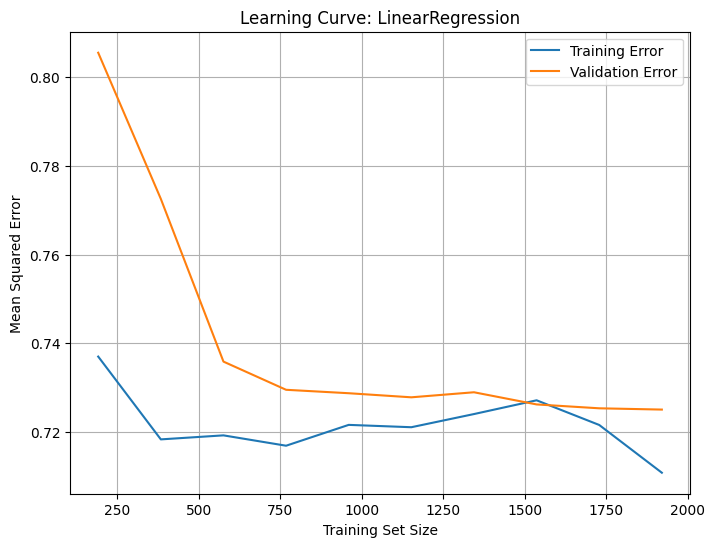

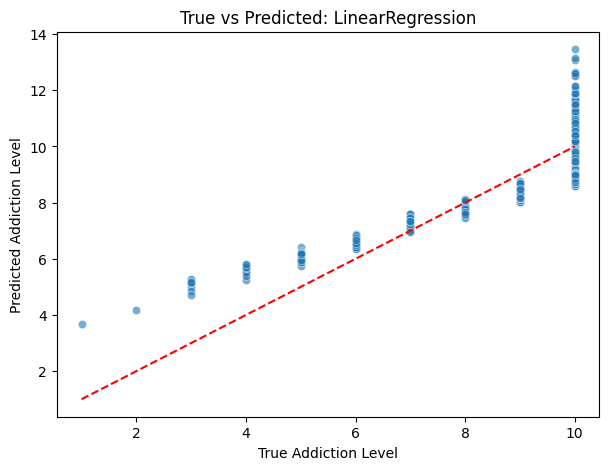

Training: Ridge
Best Params for Ridge: {'alpha': 0.1}


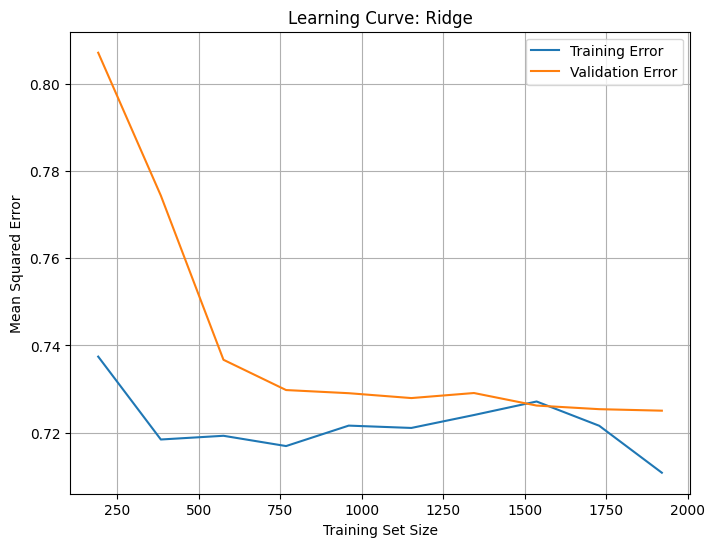

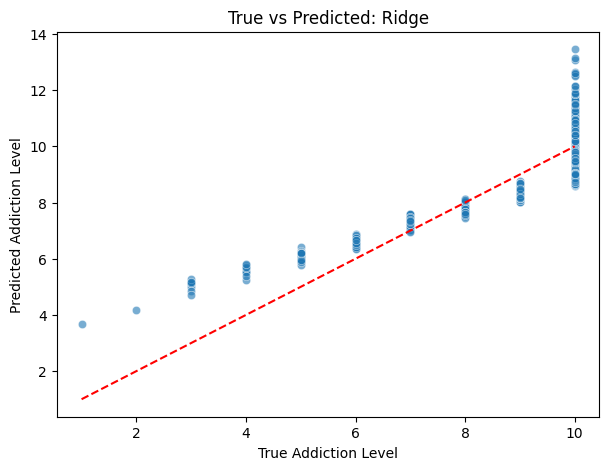

Training: Lasso
Best Params for Lasso: {'alpha': 0.01}


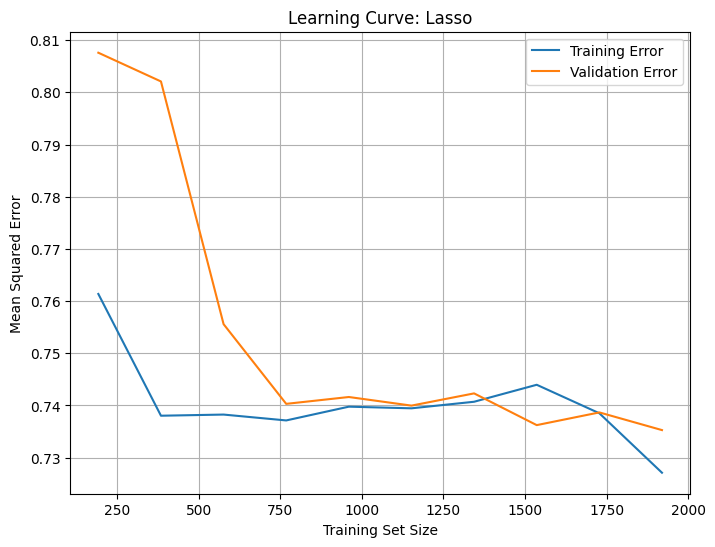

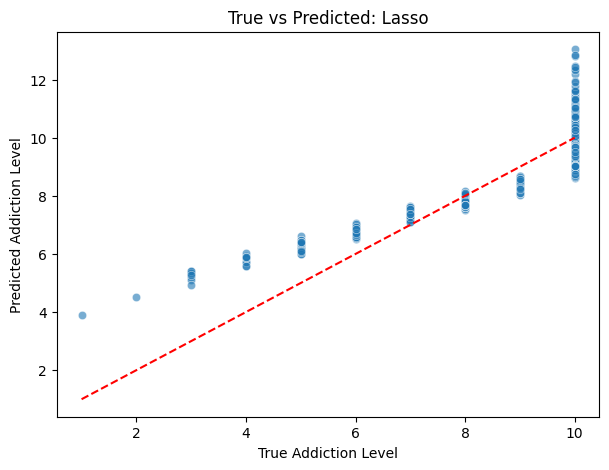

Training: RandomForestRegressor
Best Params for RandomForestRegressor: {'max_depth': None, 'n_estimators': 100}


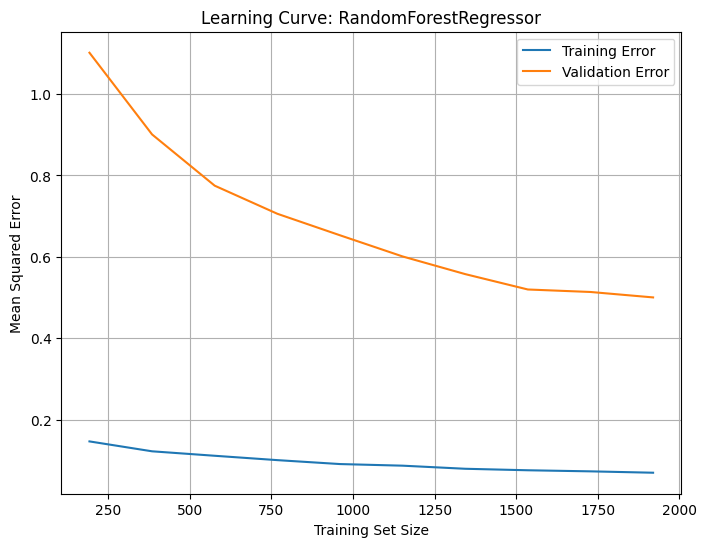

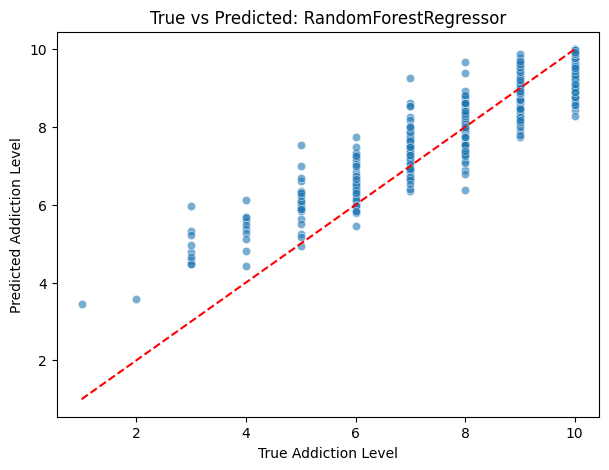

Training: GradientBoostingRegressor
Best Params for GradientBoostingRegressor: {'learning_rate': 0.1, 'n_estimators': 100}


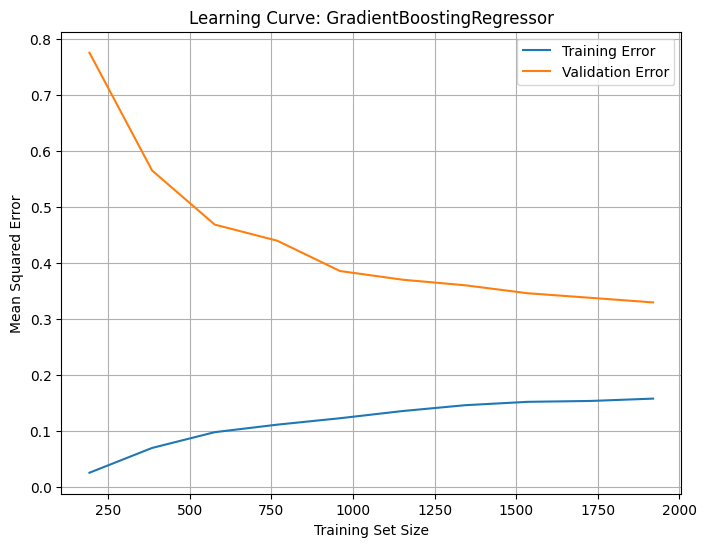

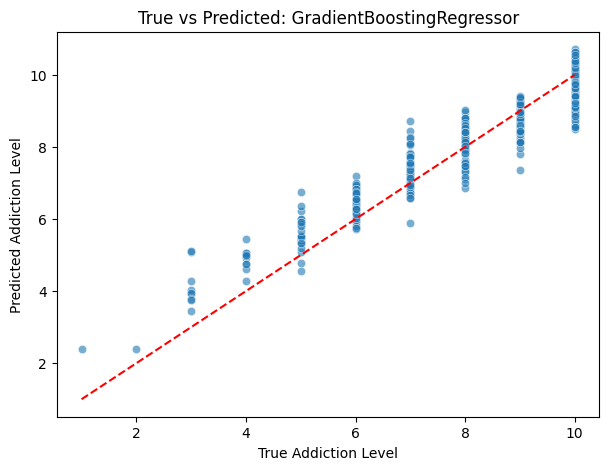

Training: MLPRegressor
Best Params for MLPRegressor: {'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'max_iter': 2000, 'n_iter_no_change': 10, 'validation_fraction': 0.1}


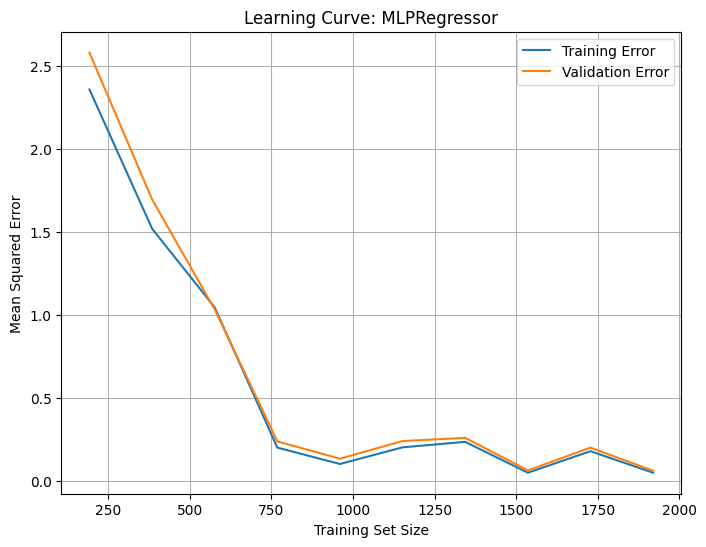

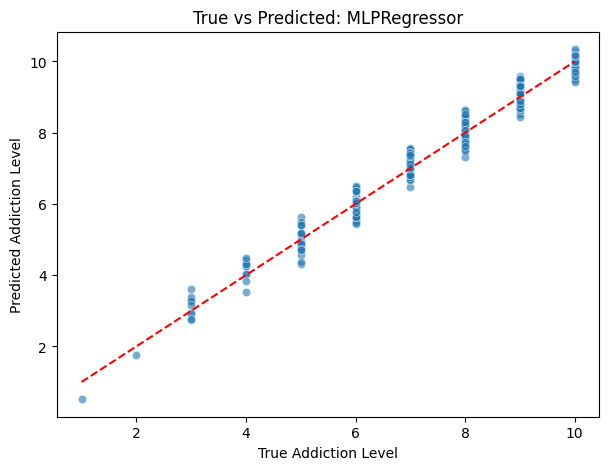

Training: XGBoostRegressor
Best Params for XGBoostRegressor: {'learning_rate': 0.05, 'n_estimators': 200}


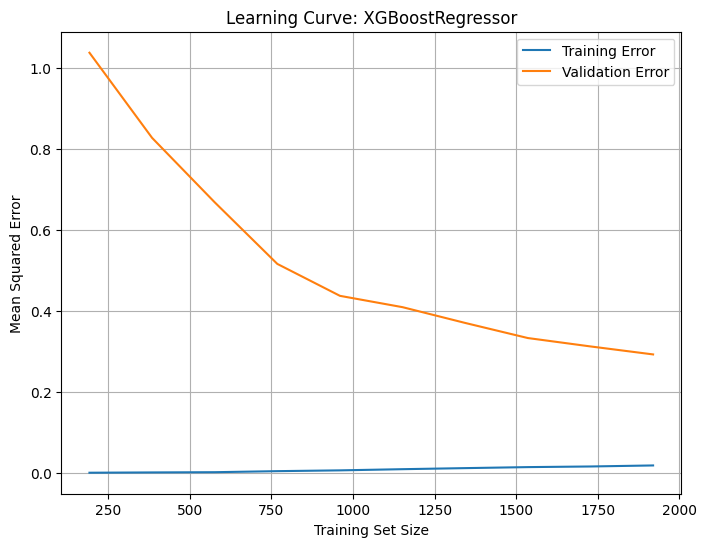

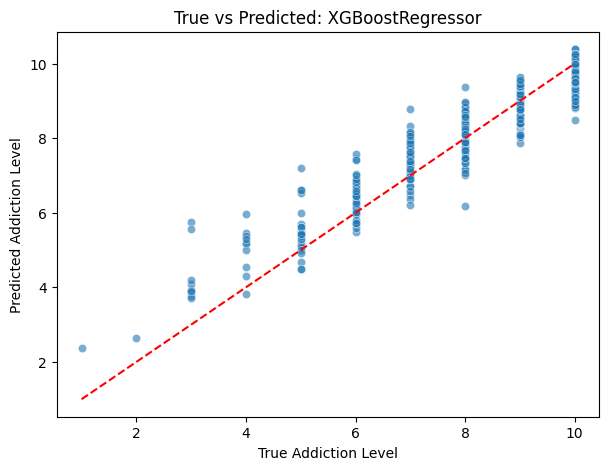

Summary of Model Performance:
                       Model       MSE       MAE        R2
5               MLPRegressor  0.059055  0.187485  0.981650
6           XGBoostRegressor  0.275573  0.364771  0.914372
4  GradientBoostingRegressor  0.289680  0.414494  0.909989
3      RandomForestRegressor  0.426954  0.451450  0.867334
1                      Ridge  0.735260  0.680180  0.771535
0           LinearRegression  0.735275  0.680050  0.771531
2                      Lasso  0.742602  0.691952  0.769254


In [20]:
train_and_evaluate(df, df_test)

## Best model: MLPRegressor

# 